In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
CLUSTER_NAME: str = 'Trumpler 5'

In [3]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [21]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')

In [22]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

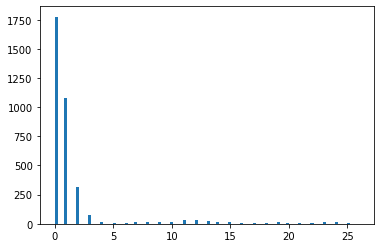

In [31]:
plt.hist(clustered.phot_rp_n_blended_transits, bins=100);

In [32]:
len(clustered[clustered.phot_rp_n_blended_transits>0])

1778

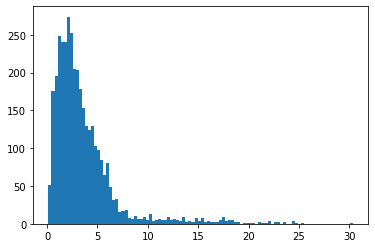

In [11]:
plt.hist(clustered.parallax_over_error, bins=100);

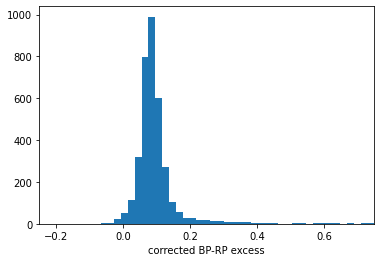

In [18]:
plt.hist(clustered.excess, bins=100);
plt.gca().set_xlim(-0.25, 0.75)
plt.gca().set_xlabel('corrected BP-RP excess');

In [33]:
good_excess = clustered[clustered.phot_rp_n_blended_transits==0]

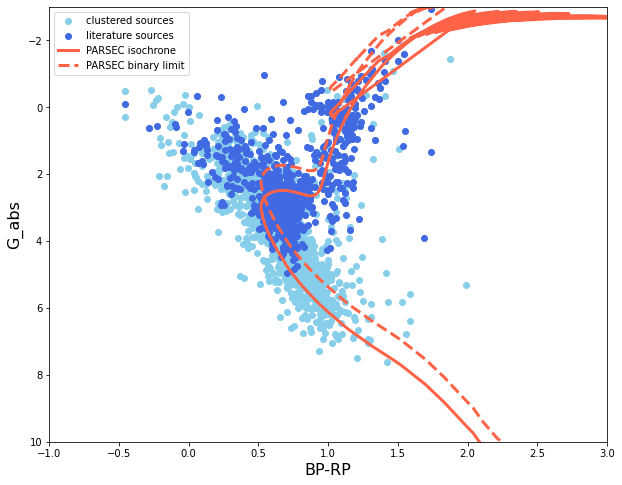

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(good_excess['BP-RP'], good_excess['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend();